# Notebook for results analysis of GAN training. 

In [4]:
#Import of necessary packages and memory allocation.

%matplotlib inline
import tensorflow as tf
import keras 
from keras import backend as K
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.8
config.gpu_options.allow_growth = True
#config.gpu_options.visible_device_list = str(3)
set_session(tf.Session(config=config))

import h5py as h5
import pandas as pd
from keras.models import load_model
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.util
import sys
import seaborn as sns
import math
#s = np.random.seed(1)

##### Creation of the channels titles : 

In [8]:
data_folder = '../../Puma_Project/data/raw/'
model_path = '../model/RESNET_V8_82l_continue4_generator.h5'

In [9]:
#Plot parameters.

sns.set() #Seaborn theme 

from matplotlib import rc
font = {'family' : 'normal','weight' : 'bold', 'size'   : 22}
tick_size = 20
fontweight = 'bold'
#lab_loc = 2
#lab_font_size = 14
#rc('text', usetex=True)
matplotlib.rc('font', **font)
plt.style.use('seaborn')

## Parameters. 

Setting up parameters for figure generations 

In [ ]:
#########
multi_train = True  #If the training was in multiple run : True
plot_var = True     #True: plot all cells result ; False : manualy change if plot_var in if True: to plot
save = False         
scale = False
#########
N_fields = 82      #Number of fields == Number of channels in generated tensor. 
N_lvls = 10         #Number of pressure level for 3D variable. 

N_gen = 800      #Number of generation used for statistic analysis /!\ Memory usage important /!\
N_train = 800
#indxs = np.random.randint(0,1000,N_gen)
#ind = indxs[0]
#########
lons = np.genfromtxt(f'../data/raw/lon.csv', delimiter=',')
lat = np.genfromtxt(f'../data/raw/lat.csv', delimiter=',')

print(lons)
lon_idx = [16,16,32,48]                    #France, north america, ecuador, south america
lat_idx = [5,106,106,106]                  #France, north america, ecuador, south america
fnes = [[16,5],[16,106],[32,106],[48,106]] #Coordinate for distribution comparison at different locations.
L_ind = ['a','b','c','d']



In [7]:
#Loading dataset and scaling factors (N_fields, 2)= mean and variance for each channel.
if N_fields==82:
    f=h5.File(f'{data_folder}T42_plasim_100y_10lay_scaled.h5','r')
    _X_train = f['dataset']
    scaling = np.transpose(f['scaling'])

print(scaling.shape)

NameError: name 'data_folder' is not defined

In [6]:
if N_fields==82:
    var = ['ta', 'ua', 'va', 'hus', 'wap', 'zeta', 'd', 'zg']
    lvls = [100, 200,300,400,500,600,700,800,900,1000]
elif N_fields==22:
    var = ['ta', 'ua', 'va', 'wa', 'pl','lat']
    lvls = [200,500,700,850,1000]


chan_titles = []
for i in var:
    for j in lvls:
        chan_titles.append(i+'_z'+str(j))
chan_titles.append('surface pressure')
#chan_titles.append('latitude')

print(chan_titles)

['ta_z100', 'ta_z200', 'ta_z300', 'ta_z400', 'ta_z500', 'ta_z600', 'ta_z700', 'ta_z800', 'ta_z900', 'ta_z1000', 'ua_z100', 'ua_z200', 'ua_z300', 'ua_z400', 'ua_z500', 'ua_z600', 'ua_z700', 'ua_z800', 'ua_z900', 'ua_z1000', 'va_z100', 'va_z200', 'va_z300', 'va_z400', 'va_z500', 'va_z600', 'va_z700', 'va_z800', 'va_z900', 'va_z1000', 'hus_z100', 'hus_z200', 'hus_z300', 'hus_z400', 'hus_z500', 'hus_z600', 'hus_z700', 'hus_z800', 'hus_z900', 'hus_z1000', 'wap_z100', 'wap_z200', 'wap_z300', 'wap_z400', 'wap_z500', 'wap_z600', 'wap_z700', 'wap_z800', 'wap_z900', 'wap_z1000', 'zeta_z100', 'zeta_z200', 'zeta_z300', 'zeta_z400', 'zeta_z500', 'zeta_z600', 'zeta_z700', 'zeta_z800', 'zeta_z900', 'zeta_z1000', 'd_z100', 'd_z200', 'd_z300', 'd_z400', 'd_z500', 'd_z600', 'd_z700', 'd_z800', 'd_z900', 'd_z1000', 'zg_z100', 'zg_z200', 'zg_z300', 'zg_z400', 'zg_z500', 'zg_z600', 'zg_z700', 'zg_z800', 'zg_z900', 'zg_z1000', 'surface pressure']


(50000, 1)
(50000, 4)


(-200, 0)

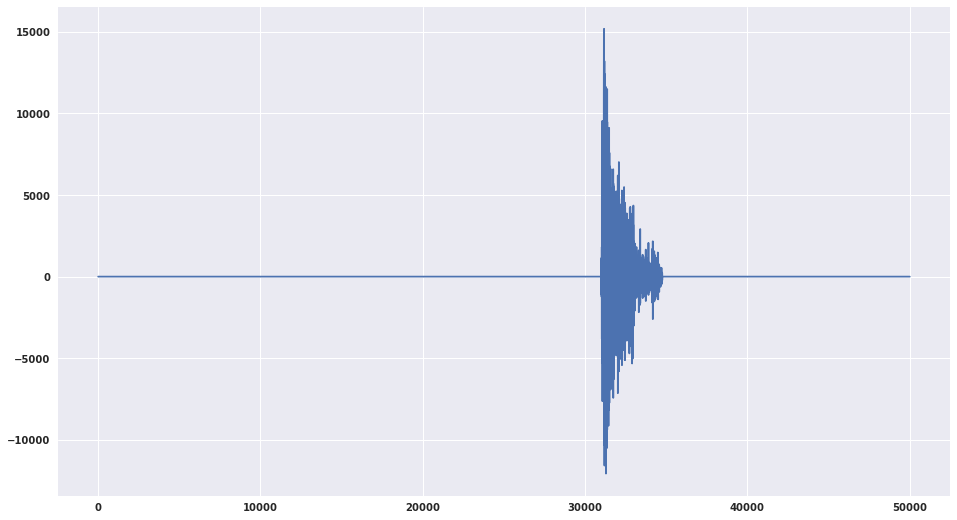

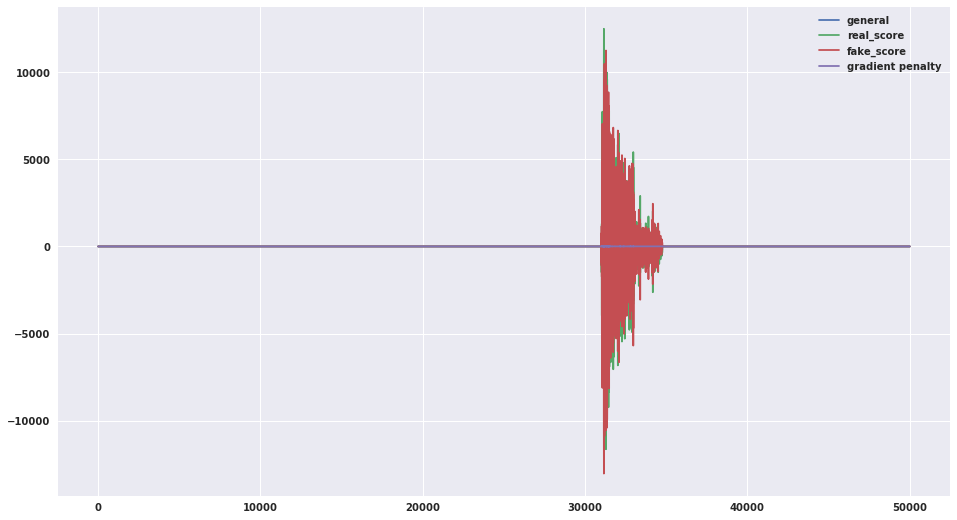

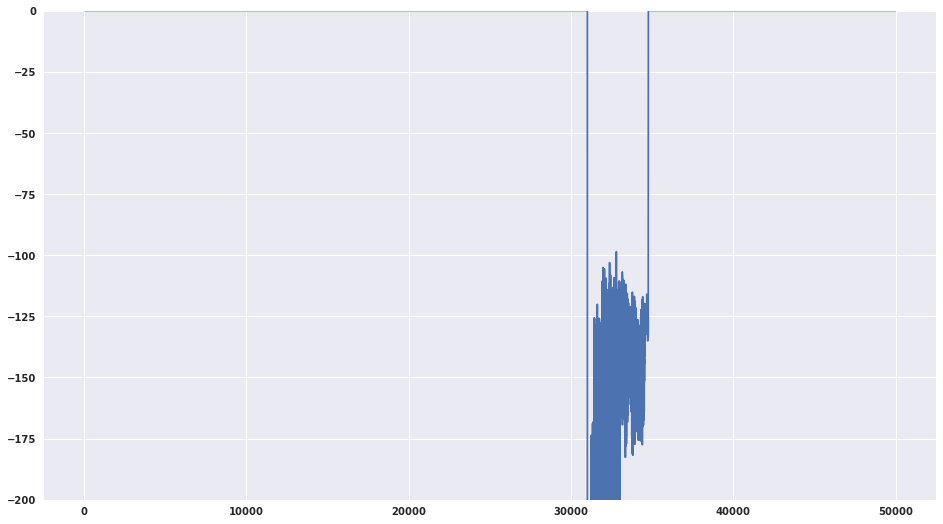

In [7]:
plt.figure(figsize = (16,9))
loss_g = np.load('/scratch/coop/besombes/Puma_Project/log_dir/'+runnumber+'/loss_hist_g.npy')
plt.plot(loss_g[:])

plt.figure(figsize = (16,9))
loss_d = np.load('/scratch/coop/besombes/Puma_Project/log_dir/'+runnumber+'/loss_hist_d.npy')
plt.plot(loss_d[:])
plt.legend(['general', 'real_score', 'fake_score', 'gradient penalty'])


print(loss_g.shape)
print(loss_d.shape)

plt.figure(figsize = (16,9))
plt.plot(loss_d[:,1]+loss_d[:,2])
plt.ylim([-200, 0])

In [8]:
import numpy

def smooth(x,window_len=51,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise ValueError# "smooth only accepts 1 dimension arrays."

    if x.size < window_len:
        raise ValueError# "Input vector needs to be bigger than window size."


    if window_len<3:
        return x

    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError# "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"


    s=numpy.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y




/softs/anaconda3/envs/tf1.12-cuda10-py36/lib/python3.6/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


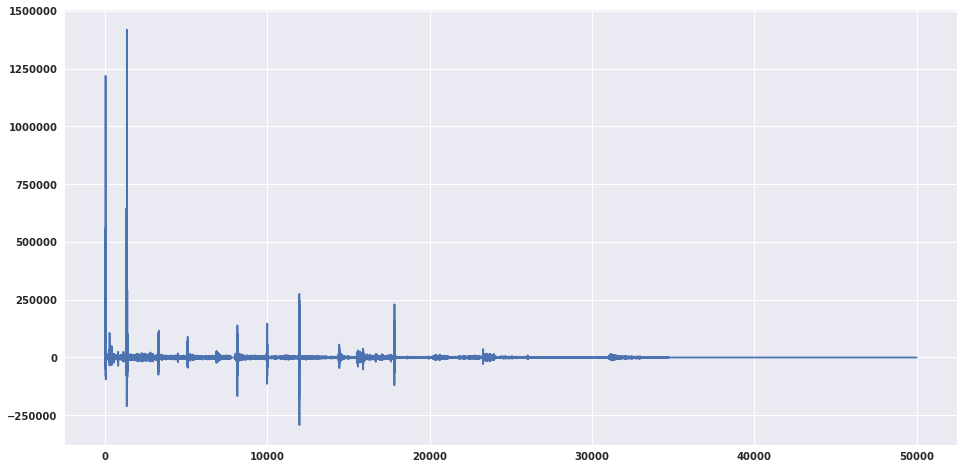

/softs/anaconda3/envs/tf1.12-cuda10-py36/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


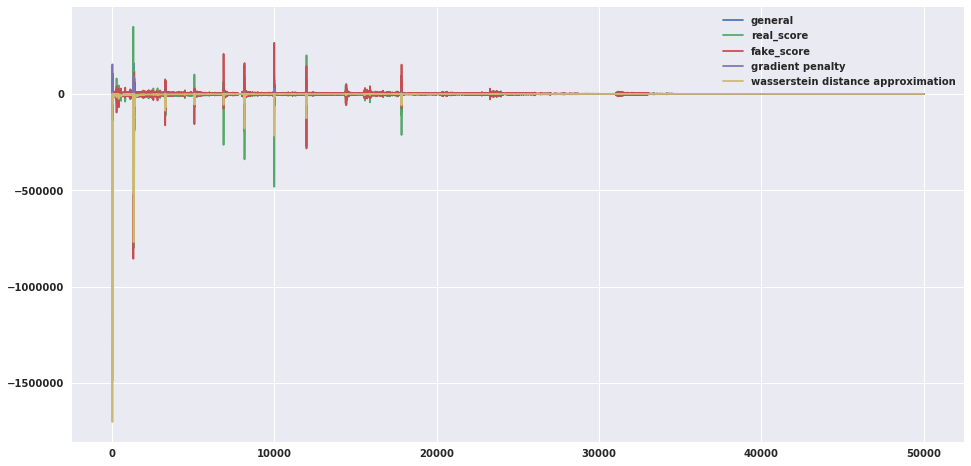

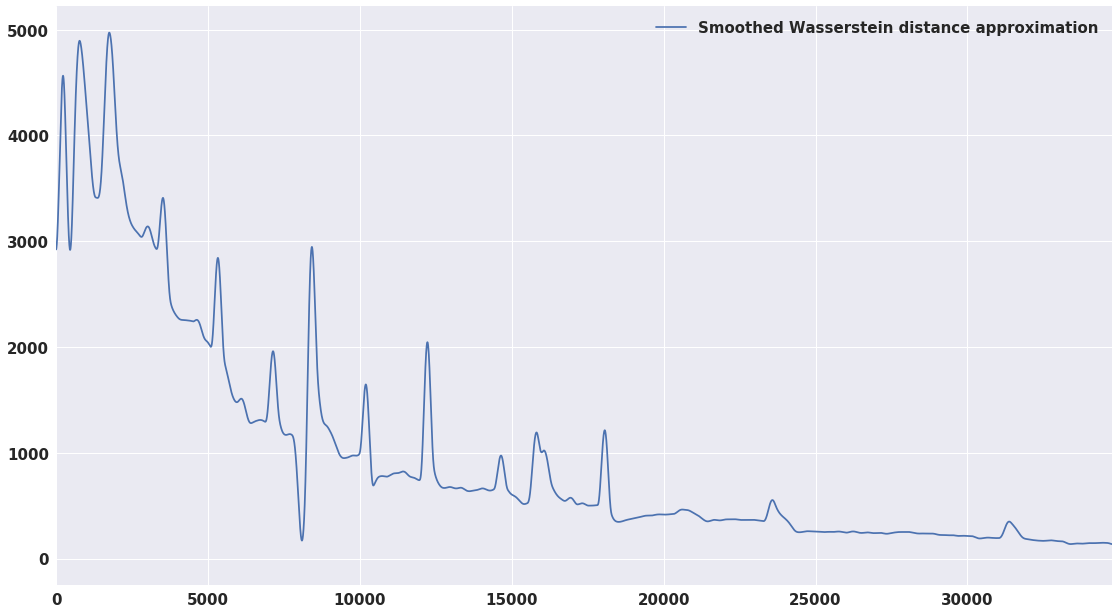

In [9]:

if multi_train:
    loss_g1 = np.load(f'/scratch/coop/besombes/Puma_Project/log_dir/{runnumber_0}/loss_hist_g.npy')
    loss_g2 = np.load(f'/scratch/coop/besombes/Puma_Project/log_dir/{runnumber_1}/loss_hist_g.npy')
    loss_g3 = np.load(f'/scratch/coop/besombes/Puma_Project/log_dir/{runnumber_2}/loss_hist_g.npy')
    loss_g4 = np.load(f'/scratch/coop/besombes/Puma_Project/log_dir/{runnumber_3}/loss_hist_g.npy')
    loss_g5 = np.load(f'/scratch/coop/besombes/Puma_Project/log_dir/{runnumber_4}/loss_hist_g.npy')
    plt.figure(figsize = (16,8))
    plt.plot(np.concatenate((loss_g1[:stop1],loss_g2[stop1:stop2], loss_g3[stop2:stop3],
                             loss_g4[stop3:stop4], loss_g5[stop4:])))
    plt.title('')
    
    plt.figure(figsize = (16,8))
    loss_d1 = np.load(f'/scratch/coop/besombes/Puma_Project/log_dir/{runnumber_0}/loss_hist_d.npy')
    loss_d2 = np.load(f'/scratch/coop/besombes/Puma_Project/log_dir/{runnumber_1}/loss_hist_d.npy')
    loss_d3 = np.load(f'/scratch/coop/besombes/Puma_Project/log_dir/{runnumber_2}/loss_hist_d.npy')
    loss_d4 = np.load(f'/scratch/coop/besombes/Puma_Project/log_dir/{runnumber_3}/loss_hist_d.npy')
    loss_d5 = np.load(f'/scratch/coop/besombes/Puma_Project/log_dir/{runnumber_4}/loss_hist_d.npy')
    plt.plot(np.concatenate((loss_d1[:stop1],loss_d2[stop1:stop2], loss_d3[stop2:stop3],
                             loss_d4[stop3:stop4], loss_d5[stop4:])))
    plt.legend(['general', 'real_score', 'fake_score', 'gradient penalty'])
    
    plt.plot(np.concatenate((loss_d1[:stop1,1],loss_d2[stop1:stop2, 1], loss_d3[stop2:stop3, 1], loss_d4[stop3:stop4,1],
                             loss_d5[stop4:,1])) + np.concatenate((loss_d1[:stop1,2],loss_d2[stop1:stop2,2],
                                                                   loss_d3[stop2:stop3, 2],loss_d4[stop3:stop4, 2],
                                                                   loss_d5[stop4:, 2])))
    plt.legend(['general', 'real_score', 'fake_score', 'gradient penalty', 'wasserstein distance approximation'])
    
    
    from scipy.signal import savgol_filter
    fig = plt.figure(figsize = (16,9))
    y = np.concatenate((loss_d1[:stop1,1],loss_d2[stop1:stop2, 1],loss_d3[stop2:stop3, 1],loss_d4[stop3:stop4, 1],
                        loss_d5[stop4:, 1])) + np.concatenate((loss_d1[:stop1,2],loss_d2[stop1:stop2,2], loss_d3[stop2:stop3, 2],
                        loss_d4[stop3:stop4, 2], loss_d5[stop4:, 2]))
    y_custom = -y
    y_custom = np.where(y_custom>5000., 5000, y_custom)
    

    yhat=smooth(y_custom,window_len=451,window='hanning' )
    plt.plot(yhat)
    plt.xlim(0,34750)
    #plt.title('Smoothed loss function', fontsize = 25)
    plt.legend(['Smoothed Wasserstein distance approximation','loss function'], fontsize = 15)
    plt.tick_params(axis = 'both',labelsize = 15)
    plt.tight_layout()
    plt.savefig(f'./fig_{N_fields}c/training_loss.pdf')
    

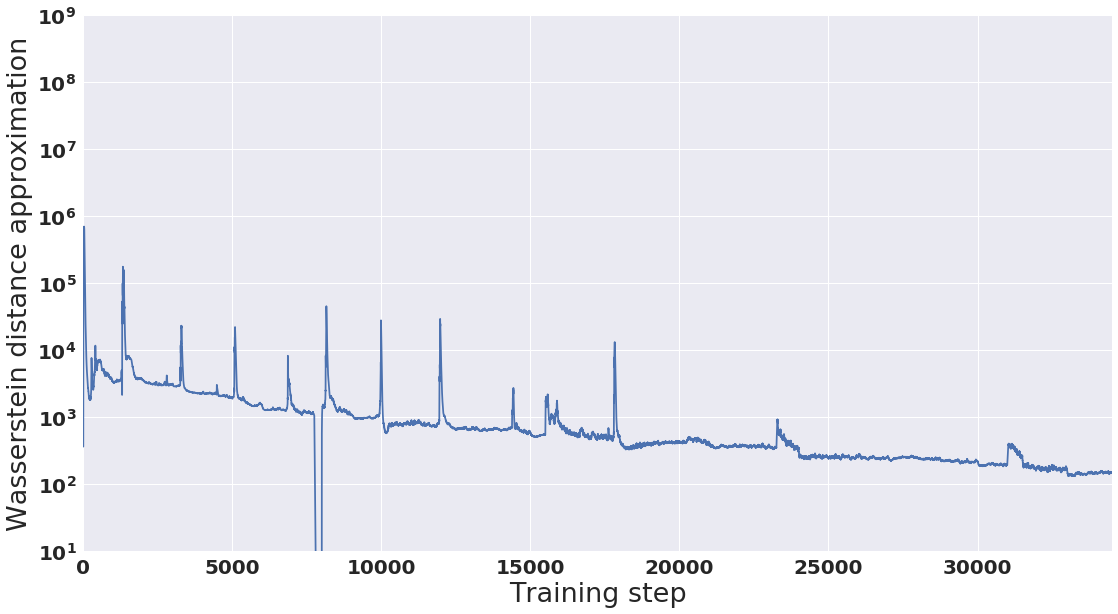

In [12]:
def smooth_curve(points, factor=0.99):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points


fig = plt.figure(figsize = (16,9))

y_custom = -y
y_custom = np.where(y_custom>5000., 5000, y_custom)


yhat=smooth_curve(-y[:],factor=0.9)
plt.plot(yhat)
plt.xlim(0,34500)
plt.ylim(10,10**9)
#plt.title('Smoothed loss function', fontsize = 25)
#plt.legend(['Wasserstein distance approximation','loss function'], fontsize = 15)
plt.tick_params(axis = 'both',labelsize = 20)
plt.xlabel('Training step', fontsize = 27)
plt.ylabel('Wasserstein distance approximation', fontsize=27)
plt.yscale('log')
#plt.xscale('log')
plt.tight_layout()
plt.savefig(f'./fig_{N_fields}c/training_loss.pdf')

In [11]:
L = [0]
if L: 
    print('True')

True


In [11]:
L = [8,9,0]

print(sorted(L))

#print(sorted(list(np.random.randint(0,_X_train.shape[0],(N_train)))))

import random
random.sample(range(1, 100), 3)

[0, 8, 9]


[23, 82, 3]